In [1]:
from utils import objective, objective_sem, read_from_json, results_to_csv
from utils_sevH import objective_sevH

import os
import sys
import random

sys.path.append('..')
from data import ER, SW, ZACHARY
import matplotlib.pyplot as plt
import numpy as np
import itertools

SEED = 7
random.seed(SEED)
np.random.seed(SEED)

In [2]:
if not os.path.exists('results'):
    os.mkdir('results')

# Common params

In [3]:
n_graphs = 64

N = 20
p_er = 0.2
g_params_er = {'type': ER, 'p': p_er}
g_params_sw = {'type': SW, 'k': 4, 'p': 0.1}
g_params_zachary = {'type': ZACHARY}
norm_S = False
norm_H = False
sort_h = False
neg_coefs = False
exp_coefs = True
pert_type = "rewire"
S_for_coefs = "binarized" # binarized, scaled, norm

p_n = 0.01
M = 50
K = 5
eps = 0.1

In [4]:
EXPS = [
    {
        "func": "estH_unpertS",
        "cy": "non-st", # not used, so not important
        "legend": "FI",
        "fmt": "o-"
    },
    {
        "func": "estH_iter",
        "cy": "non-st",
        "legend": "ITER-NONST",
        "fmt": "P-"
    },
    {
        "func": "estH_iter_rew",
        "cy": "non-st",
        "legend": "ITER-REW-NONST",
        "fmt": "p-"
    },
    {
        "func": "estH_iter_rew",
        "cy": "real",
        "legend": "ITER-REW-ST-REAL",
        "fmt": "v-"
    }
]

In [5]:
args = {
    'non-st': {
        'estH_denS': [0.001, 1.], #[gamma, delta],
        'estH_iter': [0.03, 0.005, 0., 3.5], #[lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [0.1, 0.08, 0., 5e-4, 1.], #[lambd, gamma, delta, beta, inc_gamma]
        'estH_tls_sem': [0.07, 0.4],#[0.5, 0.75][0.1, 0.01]
        'estH_llsscp': [1.] #[rho]
    },
    'real': {
        'estH_denS': [0.2, 10.], #[gamma, delta],
        'estH_iter': [5e-4, 1e-4, 10., 1.], #[lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [1, 1, 0.1, 0.01, 1.1],#[0.01, 0.2, 1., 0.01, 2.] #[lambd, gamma, delta, beta, inc_gamma] [1, 1, 0.1, 0.01, 1.1]#
        'estH_tls_sem': [0.07, 0.4]#[0.5, 0.75][0.1, 0.01]
    }, 
    'samp': {
        'estH_denS': [0.005, 0.1], #[gamma, delta_samp],
        'estH_iter': [0.4, 0.008, 0.0005, 3.], #[lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [0.2, 0.1, 0.001, 0.0001, 1.1] #[lambd, gamma, delta, beta, inc_gamma]
    }
}

# I - Filter order

In [6]:
args_coefs = {
    'non-st': {
        'estH_iter': [.02, .001, 0, 1],  # [lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [.1, .01, 0., .01, 1],  # [lambd, gamma, delta, beta, inc_gamma]
    },
    'real': {
        'estH_iter_rew': [.1, .01, .1, .001, 1.1]  # [lambd, gamma, delta, beta, inc_gamma]
    }
}

In [7]:
Ks = [2, 3, 4, 5, 6]
p_n2 = 0.05
M2 = 100
eps2 = .2

results_1 = {}
print("Starting K:", end="")
for k in Ks:
    print(f" {k}", end="", flush=True)
    results_1[k] = objective(p_n2, M2, k, eps2, EXPS, args_coefs, n_graphs, N, g_params_er,
                             exp_coefs=True, neg_coefs=True, coef=.5)
print(" - DONE")

Starting K: 2 3 4 5 6 - DONE


Text(0, 0.5, 'Median error in H coefficients')

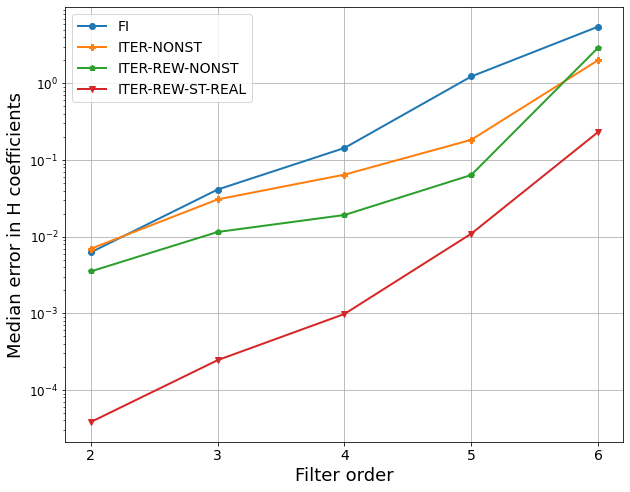

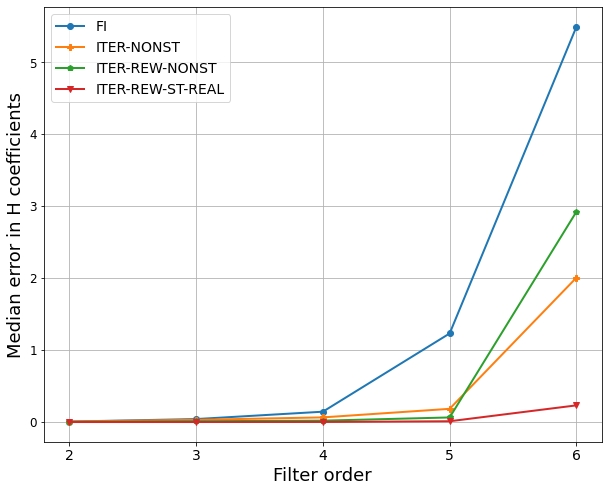

In [8]:
# Using S NOT thresholded
plt.figure(figsize=(10,8))
for i, exp in enumerate(EXPS):
    plt.semilogy(Ks, [results_1[k]['med_H_coefs'][i] for k in Ks], exp['fmt'], linewidth=2)
plt.legend([exp["legend"] for exp in EXPS], fontsize=14)
plt.xticks(Ks, Ks, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Filter order", fontsize=18)
plt.ylabel("Median error in H coefficients", fontsize=18)
#plt.savefig("images/1-FilterOrder.png", format='png')
#plt.savefig("images/1-FilterOrder.eps", format='eps')

# Using S NOT thresholded
plt.figure(figsize=(10,8))
for i, exp in enumerate(EXPS):
    plt.plot(Ks, [results_1[k]['med_H_coefs'][i] for k in Ks], exp['fmt'], linewidth=2)
plt.legend([exp["legend"] for exp in EXPS], fontsize=14)
plt.xticks(Ks, Ks, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Filter order", fontsize=18)
plt.ylabel("Median error in H coefficients", fontsize=18)
#plt.savefig("images/1-FilterOrder.png", format='png')
#plt.savefig("images/1-FilterOrder.eps", format='eps')

Text(0, 0.5, 'Median error in H coefficients')

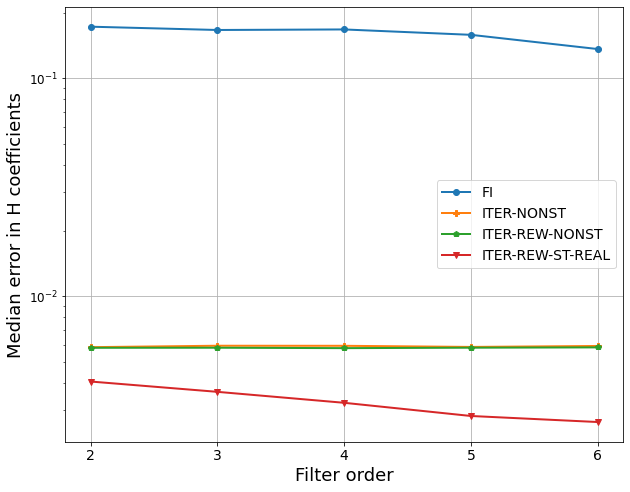

In [9]:
plt.figure(figsize=(10,8))
for i, exp in enumerate(EXPS):
    plt.semilogy(Ks, [results_1[k]['med_H'][i] for k in Ks], exp['fmt'], linewidth=2)
plt.legend([exp["legend"] for exp in EXPS], fontsize=14)
plt.xticks(Ks, Ks, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Filter order", fontsize=18)
plt.ylabel("Median error in H coefficients", fontsize=18)
#plt.savefig("images/1-FilterOrder.png", format='png')
#plt.savefig("images/1-FilterOrder.eps", format='eps')

In [10]:
results_to_csv(results_1, "Filter Order", [exp['legend'] for exp in EXPS], "med_H_coefs", "results/1-FilterOrder_decay05.csv")

# Ib - Filter order (with Polynomial filter + SGD)

In [6]:
EXPS_B = [
    # {
    #     "func": "estH_unpertS",
    #     "cy": "non-st", # not used, so not important
    #     "legend": "FI",
    #     "fmt": "o-"
    # },
    {
        "func": "estH_iter",
        "cy": "non-st",
        "legend": "ITER-NONST",
        "fmt": "P-"
    },
    {
        "func": "esth_SGD",
        'iters_out': 20,
        'iters_S': 50,
        'lr': 1e-3,
        'eval_freq': 20,
        'verbose': True,
        'debug_S': True,
        "cy": "non-st",
        "legend": "Poly-SGD",
        "fmt": "x-",
    },
    # {
    #     "func": "estH_iter_rew",
    #     "cy": "non-st",
    #     "legend": "ITER-REW-NONST",
    #     "fmt": "p-"
    # },
    # {
    #     "func": "estH_iter_rew",
    #     "cy": "real",
    #     "legend": "ITER-REW-ST-REAL",
    #     "fmt": "v-"
    # }
]

args_coefs = {
    'non-st': {
        'esth_SGD': [.02, .01],  # [lambd, beta],
        'estH_iter': [.02, .001, 0, 1],  # [lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [.1, .01, 0., .01, 1],  # [lambd, gamma, delta, beta, inc_gamma]
    },
    'real': {
        'estH_iter_rew': [.1, .01, .1, .001, 1.1]  # [lambd, gamma, delta, beta, inc_gamma]
    }
}

In [7]:
Ks = [3] #[2, 3, 4, 5, 6]
p_n2 = 0.05
M2 = 100
eps2 = .2

n_graphs = 1

results_1 = {}
print("Starting K:", end="")
for k in Ks:
    print(f" {k}", end="", flush=True)
    results_1[k] = objective(p_n2, M2, k, eps2, EXPS_B, args_coefs, n_graphs, N, g_params_er,
                             exp_coefs=True, neg_coefs=True, coef=.5, n_procs=1)
print(" - DONE")

Starting K: 3

RuntimeError: expected scalar type double but found float

Text(0, 0.5, 'Median error in H coefficients')

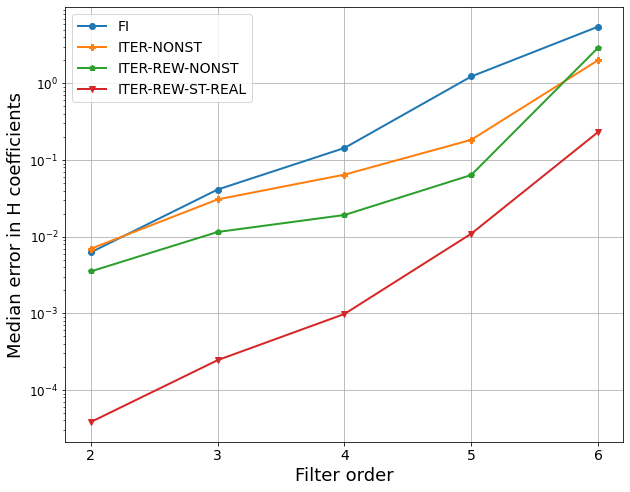

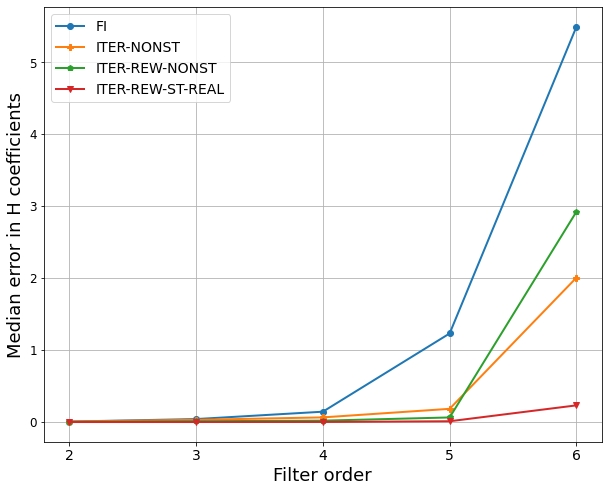

In [ ]:
# Using S NOT thresholded
plt.figure(figsize=(10,8))
for i, exp in enumerate(EXPS):
    plt.semilogy(Ks, [results_1[k]['med_H_coefs'][i] for k in Ks], exp['fmt'], linewidth=2)
plt.legend([exp["legend"] for exp in EXPS], fontsize=14)
plt.xticks(Ks, Ks, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Filter order", fontsize=18)
plt.ylabel("Median error in H coefficients", fontsize=18)
#plt.savefig("images/1-FilterOrder.png", format='png')
#plt.savefig("images/1-FilterOrder.eps", format='eps')

# Using S NOT thresholded
plt.figure(figsize=(10,8))
for i, exp in enumerate(EXPS):
    plt.plot(Ks, [results_1[k]['med_H_coefs'][i] for k in Ks], exp['fmt'], linewidth=2)
plt.legend([exp["legend"] for exp in EXPS], fontsize=14)
plt.xticks(Ks, Ks, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Filter order", fontsize=18)
plt.ylabel("Median error in H coefficients", fontsize=18)
#plt.savefig("images/1-FilterOrder.png", format='png')
#plt.savefig("images/1-FilterOrder.eps", format='eps')

Text(0, 0.5, 'Median error in H coefficients')

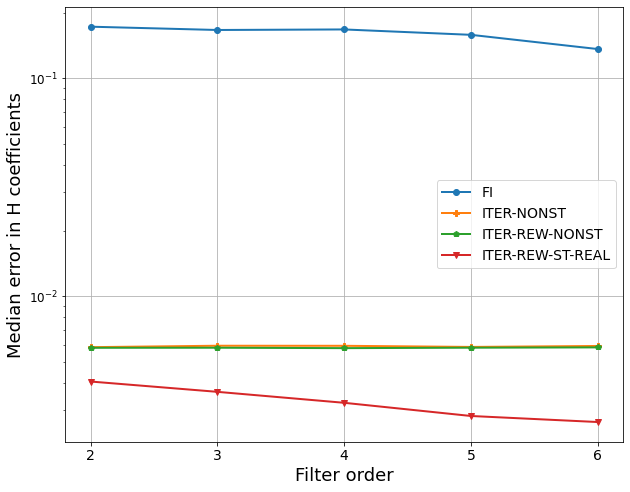

In [ ]:
plt.figure(figsize=(10,8))
for i, exp in enumerate(EXPS):
    plt.semilogy(Ks, [results_1[k]['med_H'][i] for k in Ks], exp['fmt'], linewidth=2)
plt.legend([exp["legend"] for exp in EXPS], fontsize=14)
plt.xticks(Ks, Ks, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Filter order", fontsize=18)
plt.ylabel("Median error in H coefficients", fontsize=18)
#plt.savefig("images/1-FilterOrder.png", format='png')
#plt.savefig("images/1-FilterOrder.eps", format='eps')

# II - Modifying graph and perturbation

In [11]:
# Nice for H - For S is only bad for dest links
args_SW = {
    'non-st': {
        'estH_iter_rew': [.05, .1, 0, .001, 1.1], #[lambd, gamma, delta, beta, inc_gamma]
    },
}
args_SW_dest = {
    'non-st': {
        # 'estH_iter_rew': [0.25, 0.5, 0., 0, 1.75], #[lambd, gamma, delta, beta, inc_gamma]
        'estH_iter_rew': [0.1, 0.1, 0., .001, 2],
    },
}

EXPS = [
    {
        "func": "estH_unpertS",
        "cy": "non-st",
        "legend": "ITER-NONST",
        "fmt": "P-"
    },
    {
        "func": "estH_iter_rew",
        "cy": "non-st",
        "legend": "ITER-NONST",
        "fmt": "P-"
    },
]

p_n2 = 0.01
g_types = [SW]  # [ER, SW]
perts = ["creat", "dest", "creat-dest"]  # ["creat", "dest", "creat-dest", "selective"]
eps_vals = np.arange(.05,.26, .025) #[.05, 0.1, .15, .2, .25]

results_2fi = {}
results_2rfi = {}
results_3fi = {}
results_3rfi = {}
print("Starting G params and perturbation:", end="")
for e in eps_vals:
    print(f" {e:.3f}", end="", flush=True)
    err_H_fi = []
    err_H_rfi = []
    err_S_fi = []
    err_S_rfi = []
    for g_type, pert in itertools.product(g_types, perts):
        if g_type == SW:
            g_params = g_params_sw
        else:
            g_params = g_params_er
        args_aux = args_SW_dest if pert == 'dest' else args_SW
        if pert == "selective":
            results_dict = objective(p_n2, M, K, e, EXPS, args_aux, n_graphs, N, g_params, pert_type="creat-dest",
                                     sel_ratio=4, sel_node_idx=5)
        else:
            results_dict = objective(p_n2, M, K, e, EXPS, args_aux, n_graphs, N, g_params, pert_type=pert)
        
        err_H_fi.append(results_dict['med_H'][0])
        err_H_rfi.append(results_dict['med_H'][1])
        err_S_fi.append(results_dict['med_S'][0])
        err_S_rfi.append(results_dict['med_S'][1])

        # err_H.append(results_dict['med_H'].item())
        # err_S.append(results_dict['med_S'].item())
    results_2fi[e] = np.array(err_H_fi)
    results_2rfi[e] = np.array(err_H_rfi)
    results_3fi[e] = np.array(err_S_fi)
    results_3rfi[e] = np.array(err_S_rfi)
print(" - DONE")

Starting G params and perturbation: 0.050 0.075 0.100 0.125 0.150 0.175 0.200 0.225 0.250 - DONE


Text(0, 0.5, 'H Median error')

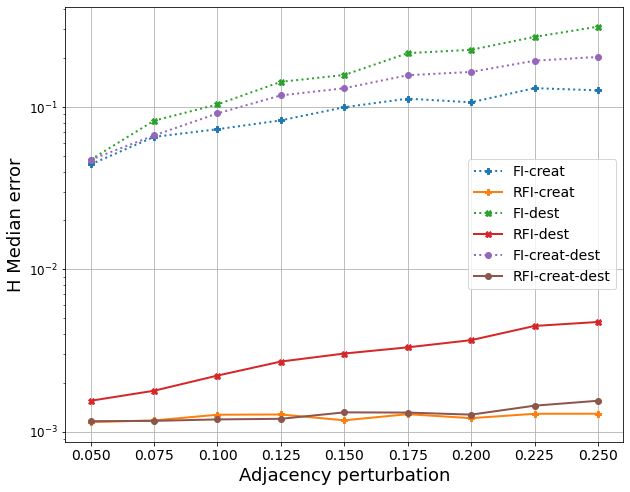

In [12]:
plt.figure(figsize=(10,8))
fmts = {"creat": "P", "dest": "X", "creat-dest": "o", "selective": "d"}
for i, (g_type, pert) in enumerate(itertools.product(g_types, perts)):
    plt.semilogy(eps_vals, [results_2fi[e][i] for e in eps_vals], f"{fmts[pert]}{':'}", linewidth=2, label=f"{'FI'}-{pert}")
    plt.semilogy(eps_vals, [results_2rfi[e][i] for e in eps_vals], f"{fmts[pert]}{'-'}", linewidth=2, label=f"{'RFI'}-{pert}")

    # ORIGINAL
    # plt.semilogy(eps_vals, [results_2[e][i] for e in eps_vals], f"{fmts[pert]}{'-' if g_type == ER else ':'}", linewidth=2, label=f"{'ER' if g_type == ER else 'SW'}-{pert}")

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Adjacency perturbation", fontsize=18)
plt.ylabel("H Median error", fontsize=18)
#plt.savefig("images/2-GraphAndPert-H.png", format='png')
#plt.savefig("images/2-GraphAndPert-H.eps", format='eps')
#plt.ylim(1e-4, 1)

Text(0, 0.5, 'S Median error')

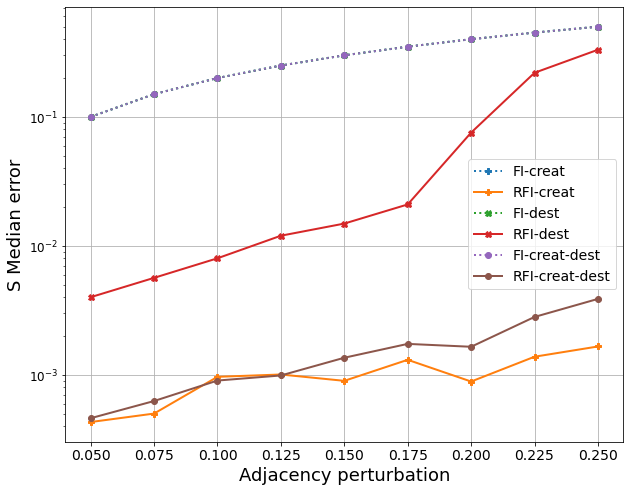

In [13]:
plt.figure(figsize=(10,8))
for i, pert in enumerate(perts):
    plt.semilogy(eps_vals, [results_3fi[e][i] for e in eps_vals], f"{fmts[pert]}{':'}", linewidth=2, label=f"{'FI'}-{pert}")
    plt.semilogy(eps_vals, [results_3rfi[e][i] for e in eps_vals], f"{fmts[pert]}{'-'}", linewidth=2, label=f"{'RFI'}-{pert}")

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Adjacency perturbation", fontsize=18)
plt.ylabel("S Median error", fontsize=18)
#plt.savefig("images/3-GraphAndPert-S.png", format='png')
#plt.savefig("images/3-GraphAndPert-S.eps", format='eps')

In [14]:
col_names_fi = []
col_names_rfi = []
for i, pert in enumerate(perts):
    col_names_fi.append(f'FI-{pert}')
    col_names_rfi.append(f'RFI-{pert}')

results_to_csv(results_2fi, "perts", col_names_fi, "", "results/pert_type_fi_errH_v1.csv")
results_to_csv(results_2rfi, "perts", col_names_rfi, "", "results/pert_type_rfi_errH_v1.csv")
results_to_csv(results_3fi, "perts", col_names_fi, "", "results/pert_type_fi_errS_v1.csv")
results_to_csv(results_3rfi, "perts", col_names_rfi, "", "results/pert_type_rfi_errS_v1.csv")

# IV - Comparison with TLS-SEM

In [15]:
EXPS = [
    {
        "func": "estH_tls_sem",
        "cy": "real",
        "legend": "TLS-SEM",
        "fmt": "P"
    },
    {
        "func": "estH_iter",
        "cy": "real",
        "legend": "RFI-iter",
        "fmt": "o"
    },
    {
        "func": "estH_llsscp",
        "cy": "non-st",
        "legend": "LLS-SCP (Natali)",
        "fmt": "s"
    }
]

In [16]:
eps_vals = [0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
results_4 = {}
print("Starting comparison with TLS-SEM:", end="")
for e in eps_vals:
    print(f" {e}", end="", flush=True)
    results_4[e] = objective_sem(p_n, M, K, e, EXPS, args, n_graphs, N, g_params_er)  
print(" - DONE")

Starting comparison with TLS-SEM: 0.0 0.05 0.1 0.15 0.2 0.25 0.3 - DONE


Text(0, 0.5, 'H Median error')

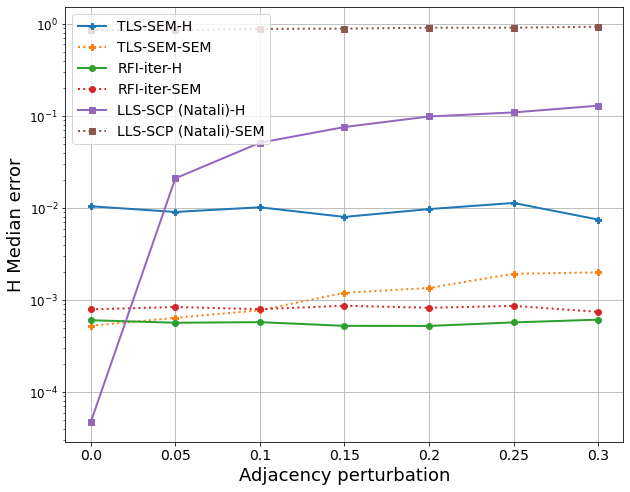

In [17]:
plt.figure(figsize=(10,8))
for j, exp in enumerate(EXPS):
    plt.semilogy(eps_vals, [results_4[e]['med_H'][0,j] for e in eps_vals], f"{exp['fmt']}-", linewidth=2, label=f"{exp['legend']}-H")
    plt.semilogy(eps_vals, [results_4[e]['med_H'][1,j] for e in eps_vals], f"{exp['fmt']}:", linewidth=2, label=f"{exp['legend']}-SEM")
plt.legend(fontsize=14)
plt.xticks(eps_vals, eps_vals, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Adjacency perturbation", fontsize=18)
plt.ylabel("H Median error", fontsize=18)
#plt.savefig("images/4-ComparisonTLS-LLS.png", format='png')
#plt.savefig("images/4-ComparisonTLS-LLS.eps", format='eps')

In [18]:
#results_to_csv(results_4, "Adjacency perturbation", [exp['legend'] for exp in EXPS], "med_H", "results/4-ComparisonTLS-LLS.csv")

Text(0, 0.5, 'S Median error')

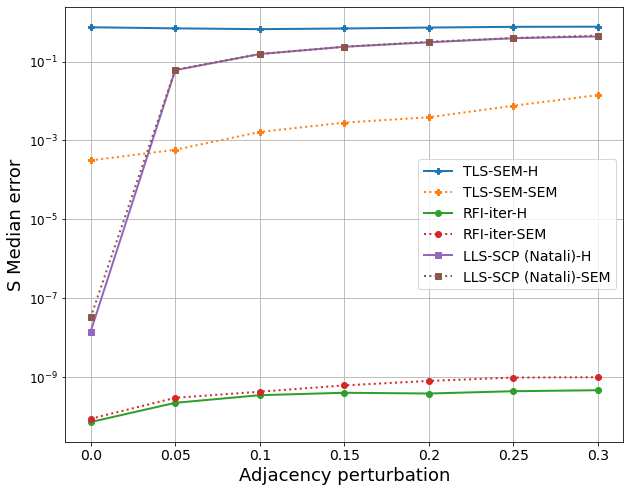

In [19]:
plt.figure(figsize=(10,8))
for j, exp in enumerate(EXPS):
    plt.semilogy(eps_vals, [results_4[e]['med_S'][0,j] for e in eps_vals], f"{exp['fmt']}-", linewidth=2, label=f"{exp['legend']}-H")
    plt.semilogy(eps_vals, [results_4[e]['med_S'][1,j] for e in eps_vals], f"{exp['fmt']}:", linewidth=2, label=f"{exp['legend']}-SEM")
plt.legend(fontsize=14)
plt.xticks(eps_vals, eps_vals, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Adjacency perturbation", fontsize=18)
plt.ylabel("S Median error", fontsize=18)

# V - RFI vs Joint-RFI

In [20]:
exps = read_from_json('exps/exps_5_sevH_T.json')

In [21]:
args_sevH = {
    'non-st': {
        'estH_denS': [0.001, 1.], #[gamma, delta],
        'estH_iter': [3e-2, 5e-3, 0., 4.],#[1e-4, 2, 0., 1.5], #[lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [0.1, 0.08, 0., 5e-4, 1.],#[1e-3, 5, 0., 1e-2, 3.],#[0.1, 0.1, 0., 0.0001, 1.1], #[lambd, gamma, delta, beta, inc_gamma]
        'estH_tls_sem': [0.07, 0.38],#[0.5, 0.75]#[0.07, 0.4][0.1, 0.01]
        'estHs_denS': [1, 0.1], #[gamma, delta],
        'estHs_iter': [0.4, 1e-3, 0., 1.5],#[0.03, 0.005, 0., 4.], #[lambd, gamma, delta, inc_gamma],
        'estHs_iter_rew': [0.02, 1e-4, 0., 5e-4, 2.] #[lambd, gamma, delta, beta, inc_gamma]
    },
    'real': {
        'estH_denS': [0.2, 10.], #[gamma, delta],
        'estH_iter': [5e-4, 1e-4, 10., 1.], #[lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [1, 1, 0.1, 0.01, 1.1],#[0.01, 0.2, 1., 0.01, 2.] #[lambd, gamma, delta, beta, inc_gamma] [1, 1, 0.1, 0.01, 1.1]#
        'estHs_denS': [1, 0.1], #[gamma, delta],
        'estHs_iter': [0.1, 0.1, 1, 1.1], #[lambd, gamma, delta, inc_gamma],
        'estHs_iter_rew': [0.1, 0.1, 1, 0.0001, 1.1] #[lambd, gamma, delta, beta, inc_gamma]
    }, 
    'samp': {
        'estH_denS': [0.005, 0.1], #[gamma, delta_samp],
        'estH_iter': [0.01, 2e-3, 2e-3, 1.3], #[lambd, gamma, delta, inc_gamma],
        'estH_iter_rew': [1e-3, 5, 0.001, 1e-2, 3.], #[lambd, gamma, delta, beta, inc_gamma]
        'estHs_denS': [1, 0.1], #[gamma, delta],
        'estHs_iter': [0.2, 1e-3, 0.02, 1.6], #[lambd, gamma, delta, inc_gamma],
        'estHs_iter_rew': [0.07, 1e-3, 0.1, 5e-4, 3.]#[0.1, 0.1, 1, 0.0001, 1.1] #[lambd, gamma, delta, beta, inc_gamma]
    }
}

In [22]:
Ts = [1, 3, 5]
Ts = [1,2,3,4,5]
results_5 = {}
print("Starting T:", end="")
for t in Ts:
    print(f" {t}", end="", flush=True)
    results_5[t] = objective_sevH(0.01, 15, K, 0.3, t, exps, args_sevH, n_graphs, N, g_params_sw)#_er) #n_graphs
print(" - DONE")

Starting T: 1 2 3 4 5 - DONE


Text(0, 0.5, 'H Median error')

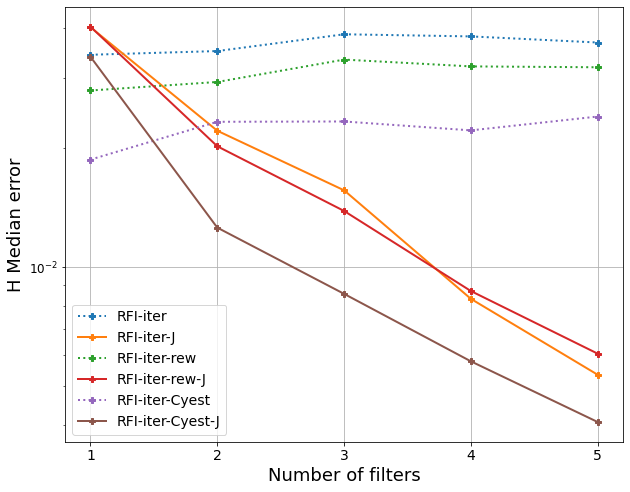

In [23]:
plt.figure(figsize=(10,8))
for i, exp in enumerate(exps):
    plt.semilogy(Ts, [results_5[t]['med_H'][i] for t in Ts], f"{exp['fmt']}{'-' if exp['joint'] else ':'}", linewidth=2)
plt.legend([exp["legend"] for exp in exps], fontsize=14)
plt.xticks(Ts, Ts, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Number of filters", fontsize=18)
plt.ylabel("H Median error", fontsize=18)
#plt.savefig("images/5-Joint-RFI.png", format='png')
#plt.savefig("images/5-Joint-RFI.eps", format='eps')

In [24]:
results_to_csv(results_5, "Number of filters", [exp['legend'] for exp in EXPS], "med_H", "results/5-Joint-RFI.csv")

Text(0, 0.5, 'S Median error')

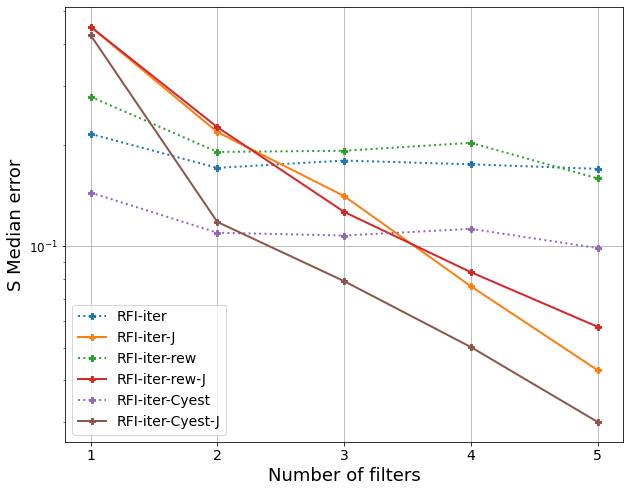

In [25]:
plt.figure(figsize=(10,8))
for i, exp in enumerate(exps):
    plt.semilogy(Ts, [results_5[t]['med_S'][i] for t in Ts], f"{exp['fmt']}{'-' if exp['joint'] else ':'}", linewidth=2)
plt.legend([exp["legend"] for exp in exps], fontsize=14)
plt.xticks(Ts, Ts, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Number of filters", fontsize=18)
plt.ylabel("S Median error", fontsize=18)

# VI and VII - Evolution of error with number of samples

In [26]:
exps = read_from_json('exps/exps_6_samp_exp.json')

In [27]:
Ms = [15, 40, 100, 300]#, 500]
results_6 = {}
print("Starting M:", end="")
for m in Ms:
    print(f" {m}", end="", flush=True)
    results_6[m] = objective_sevH(0.03, m, K, 0.4, 3, exps, args_sevH, n_graphs, N, g_params_zachary) #n_graphs
print(" - DONE")

Starting M: 15 40 100 300 - DONE


Text(0, 0.5, 'H Median error')

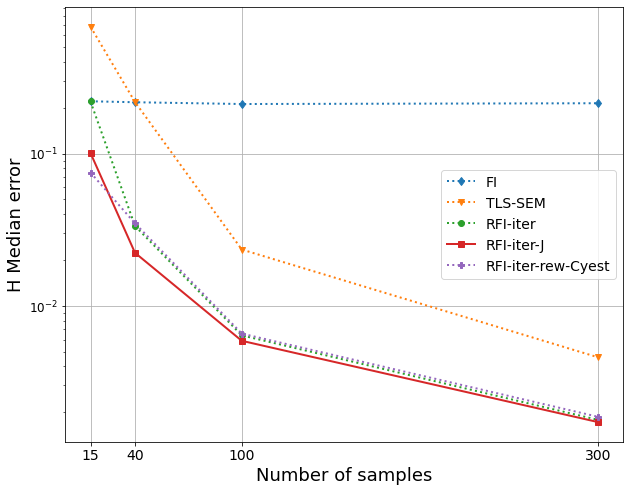

In [28]:
plt.figure(figsize=(10,8))
for i, exp in enumerate(exps):
    plt.semilogy(Ms, [results_6[m]['med_H'][i] for m in Ms], f"{exp['fmt']}{'-' if exp['joint'] else ':'}", linewidth=2)
plt.legend([exp["legend"] for exp in exps], fontsize=14)
plt.xticks(Ms, Ms, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Number of samples", fontsize=18)
plt.ylabel("H Median error", fontsize=18)
#plt.savefig("images/6-SamplesExperiment-H.png", format='png')
#plt.savefig("images/6-SamplesExperiment-H.eps", format='eps')

In [29]:
results_to_csv(results_6, "Number of samples", [exp['legend'] for exp in EXPS], "med_H", "results/6-SamplesExperiment-H.csv")

Text(0, 0.5, 'S Median error')

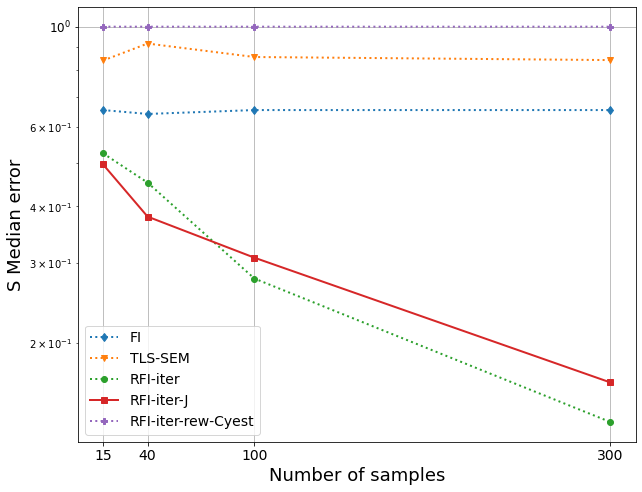

In [30]:
plt.figure(figsize=(10,8))
for i, exp in enumerate(exps):
    plt.semilogy(Ms, [results_6[m]['med_S'][i] for m in Ms], f"{exp['fmt']}{'-' if exp['joint'] else ':'}", linewidth=2)
plt.legend([exp["legend"] for exp in exps], fontsize=14)
plt.xticks(Ms, Ms, fontsize=14)
plt.yticks(fontsize=12)
plt.grid()
plt.xlabel("Number of samples", fontsize=18)
plt.ylabel("S Median error", fontsize=18)
#plt.savefig("images/7-SamplesExperiment-S.png", format='png')
#plt.savefig("images/7-SamplesExperiment-S.eps", format='eps')

In [31]:
results_to_csv(results_6, "Number of samples", [exp['legend'] for exp in EXPS], "med_S", "results/7-SamplesExperiment-S.csv")